<a href="https://colab.research.google.com/github/abe2701/data_science/blob/main/Analisando_os_Dados_do_Airbnb_Lisboa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Análise dos Dados do Airbnb - Lisboa

# <p align="center"> [![author](https://img.shields.io/badge/Linkedin-abelardoalves-blue.svg)](https://www.linkedin.com/in/abelardo-alves)

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="30%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Lisboa, e ver quais insights podem ser extraídos a partir de dados brutos.**
<br><br>

<center><img alt="Lisboa" width="80%" src="https://vemvoar.voeazul.com.br/wp-content/uploads/2018/06/Lisboa.jpg"></center>

## Extração de Dados

Os dados contidos nessse arquivo foram retirados do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).
Para realizar análise exploratória, somente será utilizado o arquivo:

* `listing.csv` - *Summary information and metrics for listings in Lisbon (good for visualisations).*

Atenção: Os dados contidos no portal são constantemente atualizados, portanto, é possível que o link utilizado seja alterado e acabe quebrando o código do arquivo.

Agora, vamos ao projeto.


In [21]:
# importar os pacotes necessarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# importar o arquivo listings.csv para um DataFrame(df)
df = pd.read_csv('http://data.insideairbnb.com/portugal/lisbon/lisbon/2021-09-16/visualisations/listings.csv')

df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.697500,-9.197680,Entire home/apt,54,3,29,2021-08-08,0.34,1,60,3,NaN
1,25659,Heart of Alfama Lisbon Center - Cœur de l'Alfama,107347,Ellie,Lisboa,Santa Maria Maior,38.711670,-9.126960,Entire home/apt,45,2,121,2019-11-08,1.35,1,328,8,56539/AL.
2,29248,Apartamento Alfama com vista para o rio!,125768,Bárbara,Lisboa,Santa Maria Maior,38.712720,-9.126280,Entire home/apt,51,3,332,2019-10-29,2.75,1,171,10,23535/AL
3,29396,Alfama Hill - Boutique apartment,126415,Mónica,Lisboa,Santa Maria Maior,38.711560,-9.129870,Entire home/apt,52,2,283,2021-07-30,2.77,1,298,32,28737/AL
4,29720,TheHOUSE - Your luxury home,128075,Francisco,Lisboa,Estrela,38.711950,-9.158770,Entire home/apt,1114,2,58,2021-09-04,0.86,1,331,3,55695/AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19101,52262957,Quarto perto do jardim Príncipe Real,189741039,Eduardo,Lisboa,Misericrdia,38.715570,-9.148660,Private room,40,2,0,NaN,NaN,2,359,0,Exempt
19102,52263789,Studio Room in the Center,422738531,Julia,Lisboa,Arroios,38.733500,-9.142750,Private room,31,1,0,NaN,NaN,3,356,0,34521/AL
19103,52275675,Best location in Ericeira Praia do Sul Apartment,157128049,Alessandra,Mafra,Ericeira,38.960421,-9.416212,Entire home/apt,200,2,0,NaN,NaN,1,363,0,16836/AL
19104,52277785,NEW!! Amazing Studio with Bathtub in Baixa,415596856,Rodrigo,Lisboa,Santa Maria Maior,38.711954,-9.135315,Entire home/apt,80,1,0,NaN,NaN,5,363,0,37452/AL


## Análise dos Dados



**Dicionário das variáveis**

* `id` -	número identificador do imóvel
* `name` -	nome da propriedade
* `host_id` - número identificardor do proprietário(anfitrião) do imóvel
* `host_name` - nome do proprietário
* `neighbourhood_group` -	nome do grupo no qual o bairro pertence
* `neighbourhood` -	nome do bairro
* `latitude`	- coordenada latitude da propriedade 
* `longitude`	- coordenada longitude da propriedade
* `room_type`	- tipo do imóvel
* `price`	- preço de aluguel do imóvel
* `minimum_nights` - quantidade mínima de noites para reserva
* `number_of_reviews` -	quantidade de *reviews* que a propriedade possui
* `last_review`	- data do último *review*
* `reviews_per_month`	- quantidade de *reviews* por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - quantidade de dias disponíveis dentro de 360 dias	
* `number_of_reviews_ltm` -	quantidade de *reviews* dos últimos 12 meses
* `license` - licença do imóvel


Antes de iniciarmos a análise, vamos visualizar a primeiras 5 linhas do *dataset*.

In [23]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.69750,-9.19768,Entire home/apt,54,3,29,2021-08-08,0.34,1,60,3,NaN
1,25659,Heart of Alfama Lisbon Center - Cœur de l'Alfama,107347,Ellie,Lisboa,Santa Maria Maior,38.71167,-9.12696,Entire home/apt,45,2,121,2019-11-08,1.35,1,328,8,56539/AL.
2,29248,Apartamento Alfama com vista para o rio!,125768,Bárbara,Lisboa,Santa Maria Maior,38.71272,-9.12628,Entire home/apt,51,3,332,2019-10-29,2.75,1,171,10,23535/AL
3,29396,Alfama Hill - Boutique apartment,126415,Mónica,Lisboa,Santa Maria Maior,38.71156,-9.12987,Entire home/apt,52,2,283,2021-07-30,2.77,1,298,32,28737/AL
4,29720,TheHOUSE - Your luxury home,128075,Francisco,Lisboa,Estrela,38.71195,-9.15877,Entire home/apt,1114,2,58,2021-09-04,0.86,1,331,3,55695/AL


### **Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos identificar a quantidade de entradas que nosso *DataFrame* possui e validar o tipo de cada coluna.

O arquivo `listing.csv` que estamos analisando é a versão "resumida" do Airbnb. 

In [24]:
# identificar o volume de dados do DataFrame
print('O arquivo possui {} entradas e {} variáveis.\n'.format(df.shape[0], df.shape[1]))

# verifricar o tipo das entradas
print(df.dtypes)


O arquivo possui 19106 entradas e 18 variáveis.

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object


### **Analisando os valores ausentes presnetes no *DataFrame***

In [25]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / len(df)).sort_values(ascending=False)

reviews_per_month                 0.155187
last_review                       0.155187
license                           0.099550
host_name                         0.000942
name                              0.000419
longitude                         0.000000
host_id                           0.000000
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
room_type                         0.000000
number_of_reviews_ltm             0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
id                                0.000000
dtype: float64

Os principais *outliers* estão presentes em `reviews_per_month` e `last_review`.

Trataremos esses valores mais a diante.

### **Qual o tipo de distribuição das variáveis?** 
Para ajudar na identificação da distribuição de variáveis, iremos plotar um histograma.

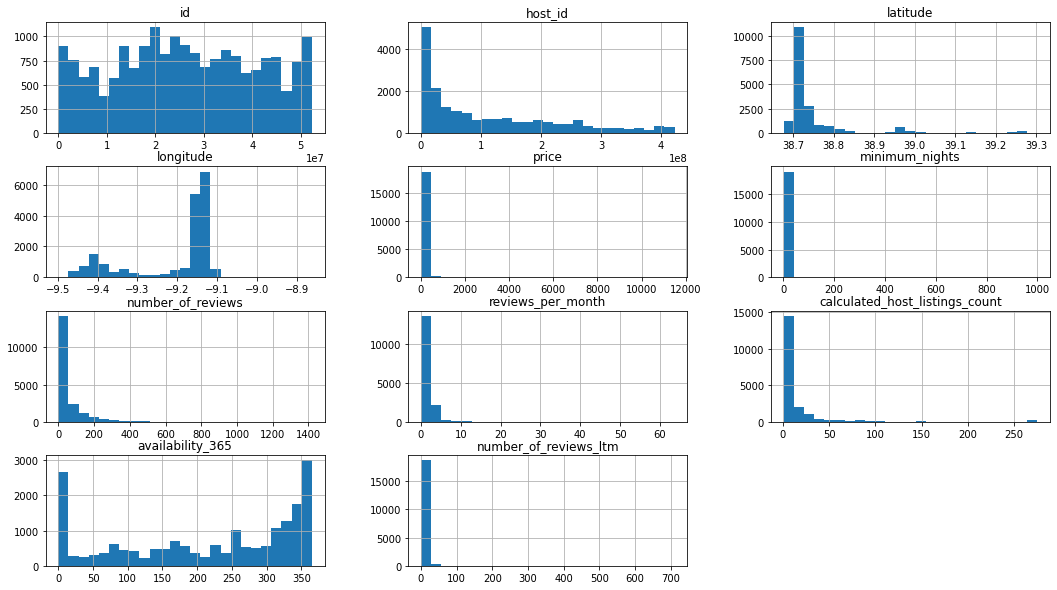

In [26]:
# plotar o histograma das variáveis numéricas
df.hist(bins=25, figsize=(18,10));

###**Existem *outliers* contidos no arquivo?**
Identificaremos valores fora da curva para podermos tratá-los posteriormente.

In [27]:
df[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,19106.000000,19106.000000,19106.000000,16141.000000,19106.000000,19106.000000
mean,106.124045,4.010468,45.002094,1.321524,14.629122,214.086831
std,223.035764,17.362487,71.292886,1.564538,37.413225,129.245671
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,50.000000,1.000000,2.000000,0.300000,1.000000,93.000000
50%,75.000000,2.000000,14.000000,0.870000,4.000000,254.000000
75%,111.000000,3.000000,58.000000,1.900000,11.000000,335.000000
max,11499.000000,1000.000000,1419.000000,63.670000,275.000000,365.000000


####Boxplot para identificar os valores fora da curva presentes em  `minimum_nights`

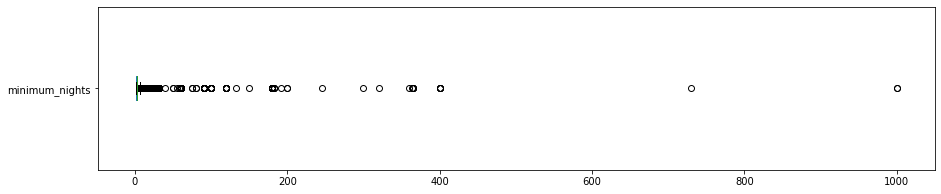

minimum_nights: valores acima de 30 dias:
119 entradas
0.6228%


In [28]:
# minimum_nights
df.minimum_nights.plot(kind='box',vert=False, figsize=(15, 3))
plt.show()

# apresentar quantidade de valores acima de 30 dias para minimum_nights
print('minimum_nights: valores acima de 30 dias:')
print('{} entradas'.format(len(df[df.minimum_nights > 30])))
print('{:.4}%'.format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price
Apresentaremos o Boxplot para realizar a limpeza dos *outliers* em seguida.

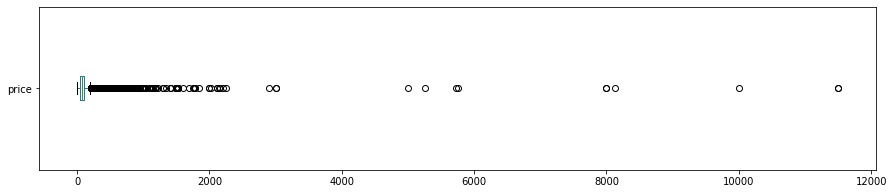


price: valores acimade de 1500
32 entradas
0.0471%


In [29]:
#prince
df.price.plot(kind='box', vert=False, figsize=(15,3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print('\nprice: valores acimade de 1500')
print('{} entradas'.format(len(df[df.price > 1500])))
print('{:.4f}%'.format((len(df[df.price > 5000]) / df.shape[0]*100)))

####Histogramas sem *outliers*
Agora iremos remover os valores fora da curva, para que possamos apresentar de maneira mais clara.

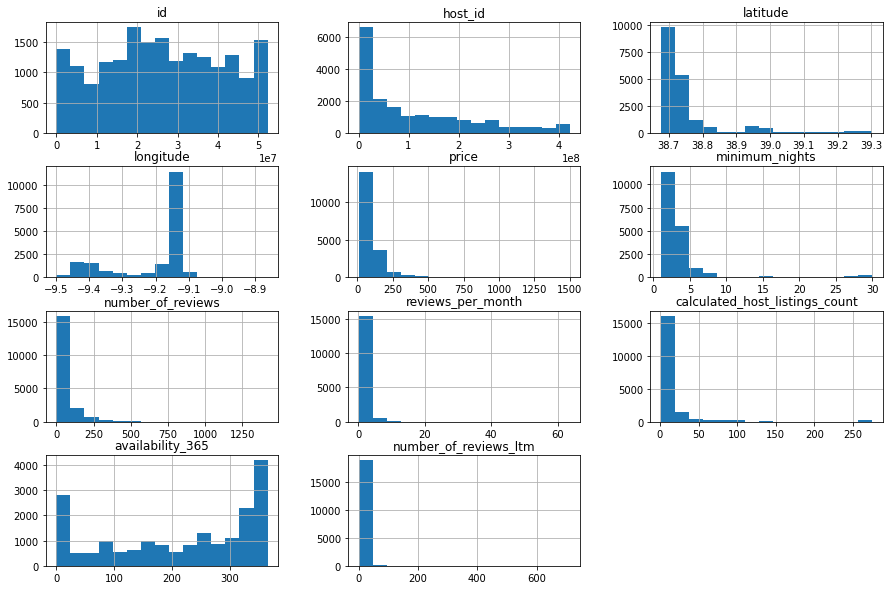

In [30]:
# remover os outliers e criar um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price < 9].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Média dos preços para locação**
Após a remoção dos *outliers* podemos apresentar a média com maior propriedade.

In [31]:
# ver a média da coluna price
print('O valor médio do aluguel em Lisboa de €{:.2f}.'.format(df_clean.price.mean()))



O valor médio do aluguel em Lisboa de €100.04.


### **Média do mínimo de noites para aluguel**

In [32]:
# ver a média da coluna `minimum_night
print('A média mínima para aluguel é de {:.2} noites.'.format(df_clean.minimum_nights.mean()))

A média mínima para aluguel é de 3.1 noites.


Concluímos que é possível se hospedar por 3 noites gastando em média €100.

### **Qual tipo e imóvel podemos encontrar em Lisboa?**

Caso esteja pensando em conhencer Lisboa, o Airbnb oferece 4 tipos de acomodações.

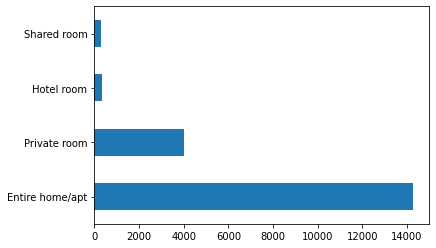

In [33]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_room_type = df_clean.room_type.value_counts()
ax = df_room_type.plot.barh()

Lisboa oferece mais de 14k acomodações do tipo `Entire home/apt`.

In [34]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.753654
Private room       0.212737
Hotel room         0.017517
Shared room        0.016092
Name: room_type, dtype: float64

Consequentemente, a porcentagem para imóveis de tipo `Entire home/apt` é de 75%. 

###**Imóveis com a maior quantidade de avaliações**

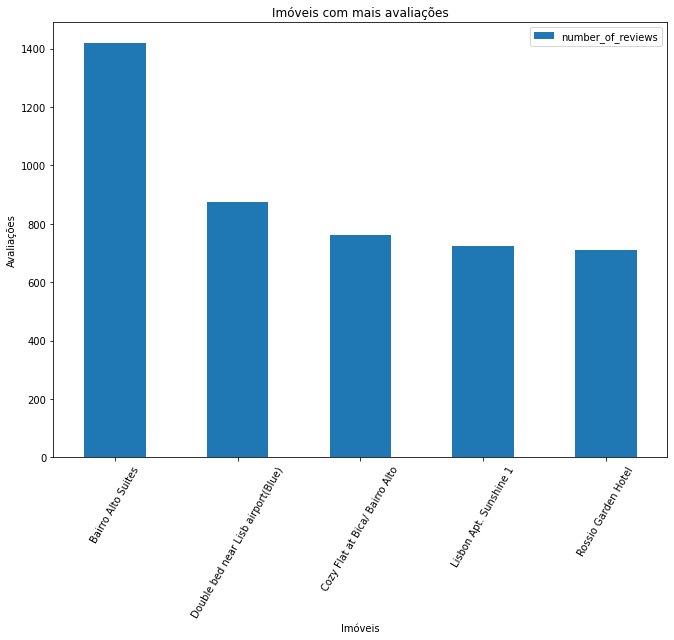

In [73]:
# top 10 imóveis com mais avalições em Lisboa
df_avaliacao = df_clean[['name','neighbourhood','number_of_reviews']].sort_values(by='number_of_reviews',ascending=False)[:5]
df_avaliacao
ax = df_avaliacao.plot.bar(figsize=(11,8))
ax.set_ylabel('Avaliações')
ax.set_xlabel('Imóveis')
ax.set_title('Imóveis com mais avaliações')
ax.set_xticklabels(df_avaliacao.name);
plt.xticks(rotation=60)

Em Lisboa, o imóvel com a maior quantidade de avalições é o **Bairro Alto Suites**.
<br><br>
<center><img alt="Bairro Alto Suites" width="90%" src="https://i.imgur.com/GVvjZgd.png"></center>

###**Localização das acomodações**

In [36]:
# importando plotly
import plotly.express as px

# plotar os imóveis pela latitude-longitude
fig = px.scatter_mapbox(df_clean, lat="latitude", lon="longitude", hover_name="name",
                        color_discrete_sequence=["blue"], zoom=10, height=500)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Podemos identificar que boa parte das acomodações estão localizadas na parte litonânea.

###**Bairros com maior quantidade de imóveis**

Text(0.5, 1.0, 'Bairros com a maior quantidade de avaliações')

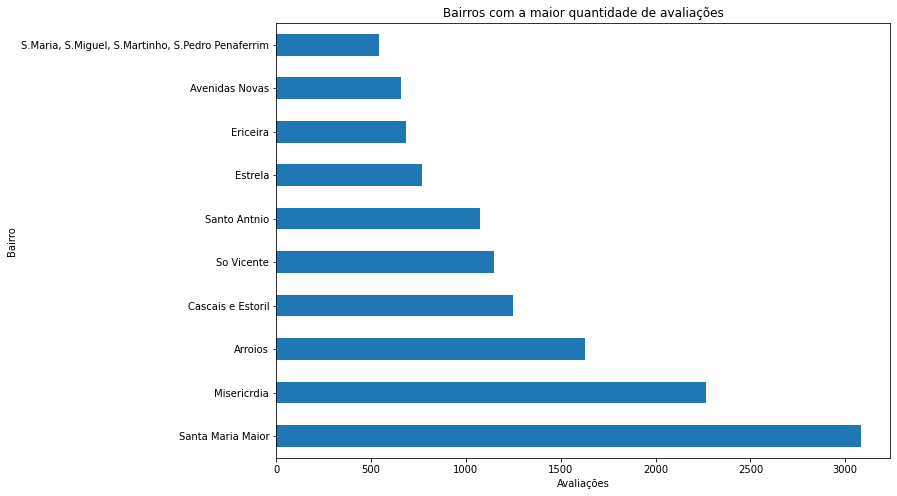

In [100]:
#df_clean.neighbourhood.value_counts(ascending=False)[:10]
ax = df_clean.neighbourhood.value_counts()[:10].plot.barh(figsize=(11,8))
ax.set_ylabel('Bairro')
ax.set_xlabel('Avaliações')
ax.set_title('Bairros com a maior quantidade de avaliações')

Os bairros de Santa Maria Maior e Misericórdia oferencem a maior quantidade de acomodações.

###**Imóveis com o maior preço para locação em Lisboa**

Após remoção dos *outliers* para melhor análise, apresentaramos os imóveis com maior preço.

In [38]:
df_clean[['name','neighbourhood','price']].sort_values(by='price',ascending=False)[:10]

,name,neighbourhood,price
14973,Casa Laranja,Cascais e Estoril,1500
6051,Visit Lisbon and go to the beach,"Oeiras e S.Julio da Barra, Pao de Arcos e Caxias",1500
2087,Sintra,Queluz e Belas,1500
10653,Stylish apartment with exclusive 80sqm terrace,Arroios,1496
18209,Heart of Estrela by The Getaway Collection,Estrela,1488
1629,Villa in cascais up to 20 with private pool,Cascais e Estoril,1415
7026,BUILDING FOR BIG GROUPS (18ROOMS&18BATH&27PAX),Arroios,1401
564,Quinta de São Thiago - Guest House,"S.Maria, S.Miguel, S.Martinho, S.Pedro Penaferrim",1350
2654,Beautiful house see for yourself !,Alcabideche,1300
13010,25-Bedroom Building in Lisbon - Perfect Location,Misericrdia,1300


O imóvel **Casa Laranja**, localizado em **Cascais** apresenta o maior valor para acomodação.
<br>
<center><img alt="Bairro Alto Suites" width="90%" src="https://i.imgur.com/qoKnbiQ.png"></center>


###**Bairros com a maior quantide de reviews**

In [39]:
# soma da quantidade de reviews por bairro 
df_clean.groupby(['neighbourhood']).number_of_reviews.sum().sort_values(ascending=False)[:15]

neighbourhood
Santa Maria Maior                                    236855
Misericrdia                                          167054
So Vicente                                            81304
Arroios                                               65605
Santo Antnio                                          55135
Estrela                                               34648
Cascais e Estoril                                     29268
S.Maria, S.Miguel, S.Martinho, S.Pedro Penaferrim     20641
Avenidas Novas                                        15967
Ericeira                                              13828
Penha de Frana                                        13120
Colares                                                9857
Olivais                                                8863
Campo de Ourique                                       7948
Belm                                                   7835
Name: number_of_reviews, dtype: int64

In [40]:
# quantidade total de reviews
print('Nosso DataFrame apresenta {} reviews.'.format(df_clean.number_of_reviews.sum()))

Nosso DataFrame apresenta 856159 reviews.


##**Conclusões**


 - Identificamos uma quantidade expressiva de ausência de valores nas variáveis `reviews_per_month`, `last_review` e `license`.

- Para uma melhor análise dos dados, removemos os *outliers* das variáveis `price` e `minimum_nights`. 

- Identificamos que a maioria das propriedades estão localizadas próximo a região litorânea.

- Após realizar a remoção dos *outliers*, com base no *dataset* analisado, podemos notar as seguintes características nos imóveis de locação de Lisboa:

 Os 4 bairros com a maior quantidade de `number_of_reviews`são, respectivamente, Santa Maria Maior 27,7%, Misericórdia 19,5%, São Vicente 9,5% e Santo Antônio 6,4%.

  1. Santa Maria Maior 27,7%
  2. Misericórdia 19,5%
  3. São Vicente 9,5%
  4. Santo Antônio 6,4%

 A cidade oferece 4 tipos de acomodação, sendo *Entire home/apt* 75,4% das acomodações, *Private room* 21.3%, *Hotel room* 1,7% e *Shared room* 1,6%.

  1.  *Entire home/apt* 75,4%
  2.  *Private room* 21.3%
  3.  *Hotel room* 1,7%
  4.  *Shared room* 1,6%

